<a href="https://colab.research.google.com/github/Devadetharu/DSA_Assignments.ipynb/blob/main/unsupervised_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Loading Data

In [43]:
from google.colab import drive

file_path = '/content/drive/MyDrive/DSA Folder/Dataset/adult_dataset.csv'
df_at = pd.read_csv(file_path)
df_at.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [44]:
df_at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


### checking duplicates

In [45]:
df_at.duplicated().sum()

np.int64(16)

In [46]:
df_at.drop_duplicates(inplace=True)
df_at.reset_index(drop=True, inplace=True)

### Handle missing values

In [47]:
df_at.isna().sum()

,0
age,2442
workclass,3362
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0


In [48]:
cat_cols = df_at.select_dtypes(include='object').columns

for col in cat_cols:
  print(f"\ncolumn: {col}")
  print(df_at[col].value_counts(dropna=False))

print("categorical columns:\n", cat_cols)


column: workclass
workclass
Private             32205
Self-emp-not-inc     3649
NaN                  3362
Local-gov            2973
State-gov            1877
?                    1763
Self-emp-inc         1624
Federal-gov          1346
Without-pay            18
Never-worked            9
Name: count, dtype: int64

column: education
education
HS-grad         15780
Some-college    10874
Bachelors        8021
Masters          2657
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              656
Doctorate         594
5th-6th           508
1st-4th           246
Preschool          83
Name: count, dtype: int64

column: marital-status
marital-status
Married-civ-spouse       22377
Never-married            16105
Divorced                  6631
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: in

In [49]:
for col in ['workclass', 'occupation', 'native-country']:
    df_at[col] = df_at[col].replace('?', np.nan)

In [50]:
df_at['age'] = df_at['age'].fillna(df_at['age'].median())
df_at['hours-per-week'] = df_at['hours-per-week'].fillna(df_at['hours-per-week'].median())

In [51]:
df_at['workclass'] = df_at['workclass'].fillna(df_at['workclass'].mode()[0])
df_at['occupation'] = df_at['occupation'].fillna(df_at['occupation'].mode()[0])
df_at['native-country'] = df_at['native-country'].fillna(df_at['native-country'].mode()[0])

In [52]:
df_at.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


### Checking for Outliers

<Axes: >

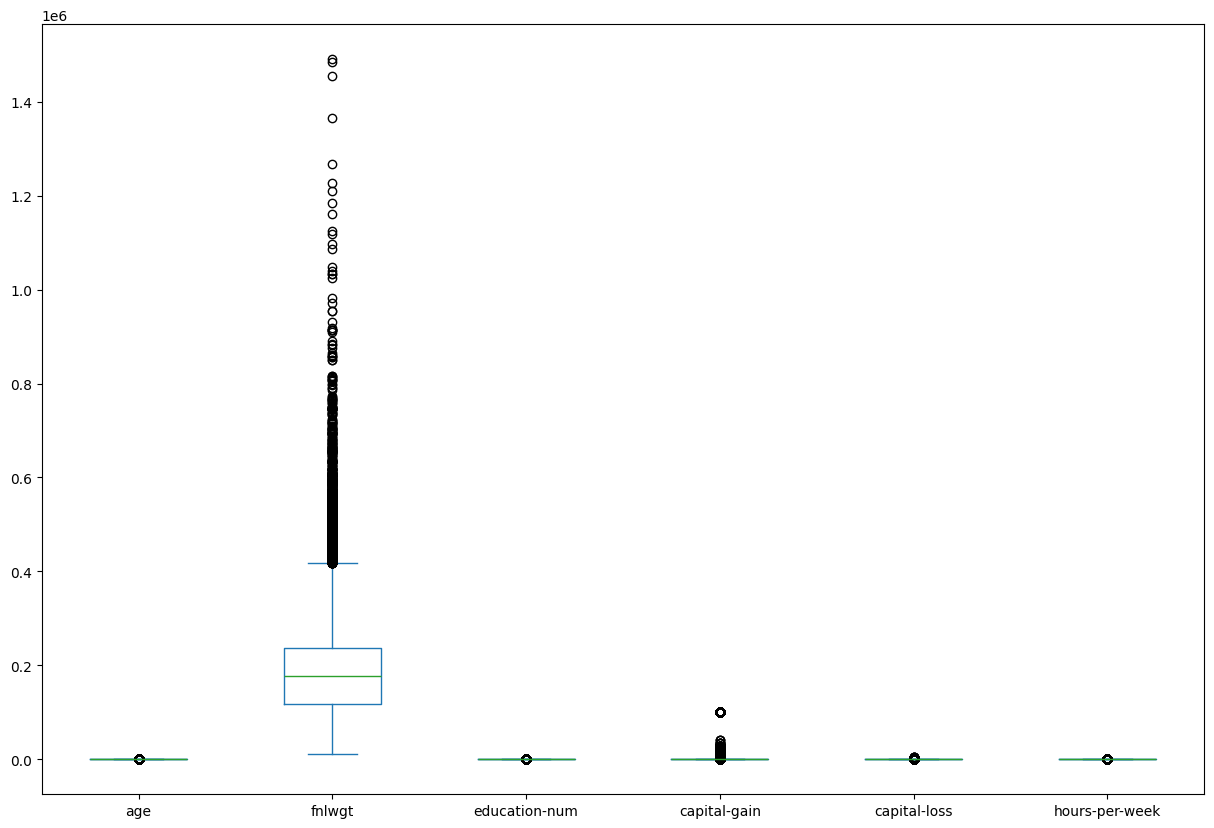

In [53]:
df_at.plot(kind='box', figsize=(15, 10))

### Removing Outliers

In [54]:
numerical_cols = df_at.select_dtypes(include=['int64','float64']).columns

for col in numerical_cols:
    Q1 = df_at[col].quantile(0.25)
    Q3 = df_at[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_at[col] = np.clip(df_at[col], lower_bound, upper_bound)

<Axes: >

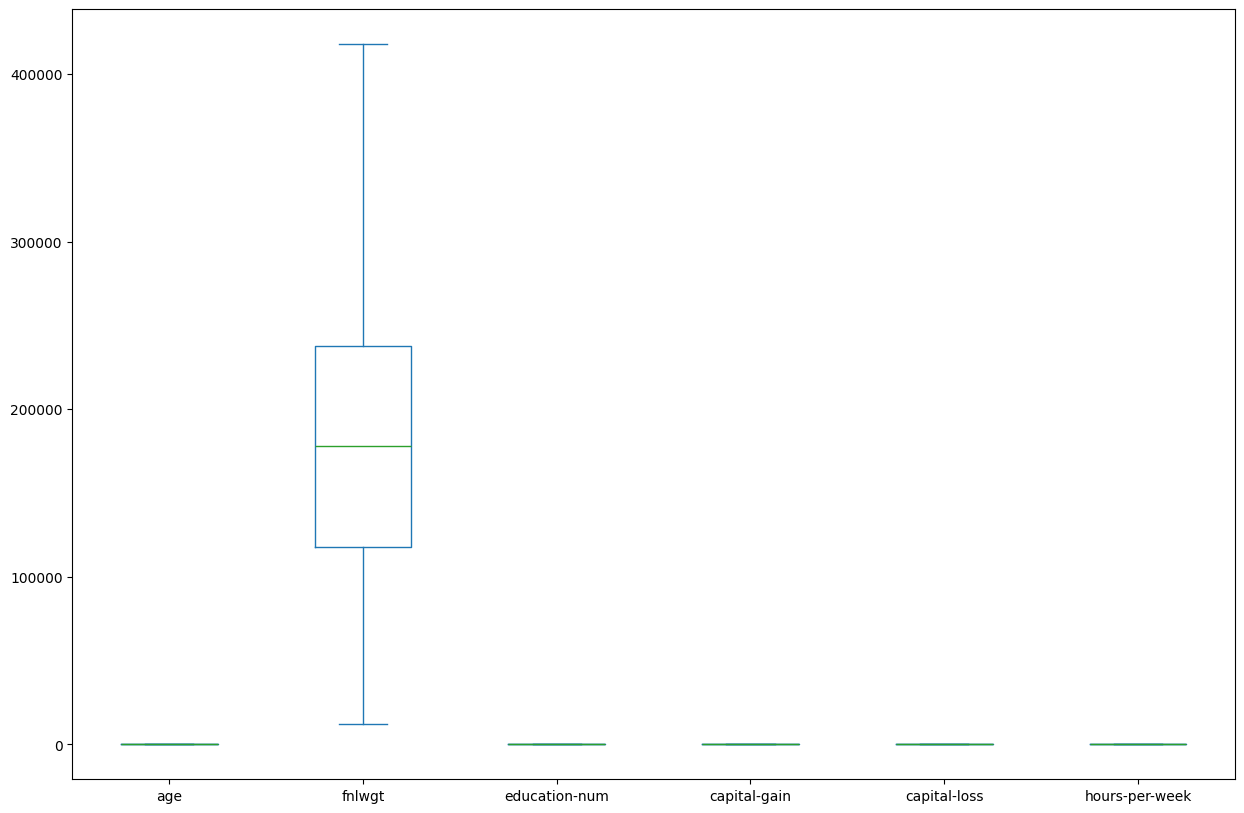

In [55]:
df_at.plot(kind='box', figsize=(15, 10))

### Analyze Correlation between variables

Replacing columns <=50K. to <=50K and >50K. to >50K

In [56]:
df_at['income'] = df_at['income'].replace('<=50K.', '<=50K')
df_at['income'] = df_at['income'].replace('>50K.', '>50K')

In [57]:
df_at['income'].value_counts()

,count
income,
<=50K,37139
>50K,11687


### Encoding

In [58]:
# stores it in a separate variable
x = df_at['income']
df_at = df_at.drop(columns=['income'])

In [59]:
# one-hot encoding
cat_columns = ['workclass','occupation','marital-status','relationship',
            'race','sex','native-country','education']
data_encoded = pd.get_dummies(df_at, columns=cat_columns, drop_first=True).astype(int)

### scaling

In [60]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)
data_scaled = pd.DataFrame(data_scaled, columns=data_encoded.columns) #for converting your data to readable spreadsheet

### PCA

In [61]:
y = data_scaled.values

In [62]:
from sklearn.decomposition import PCA

pca = PCA()
y_pca = pca.fit_transform(y)

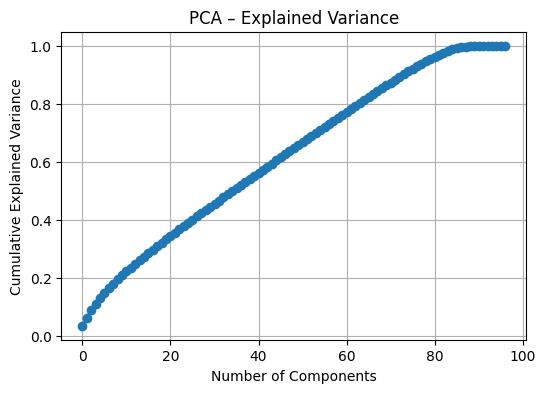

In [63]:
# Explained Variance Plot
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

plt.figure(figsize=(6,4))
plt.plot(cum_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA – Explained Variance')
plt.grid()
plt.show()

In [64]:
# Apply PCA with 95% variance
x_pca = PCA(n_components=0.95)
X_pca_95 = x_pca.fit_transform(y)

In [65]:
X_pca_95.shape

(48826, 80)

In [66]:
#Convert PCA output to DataFrame
pca_cols = [f'PC{i+1}' for i in range(X_pca_95.shape[1])]
a_d_pca = pd.DataFrame(X_pca_95, columns=pca_cols)

### Exploratory Analysis

#### Distribution of Numerical Features

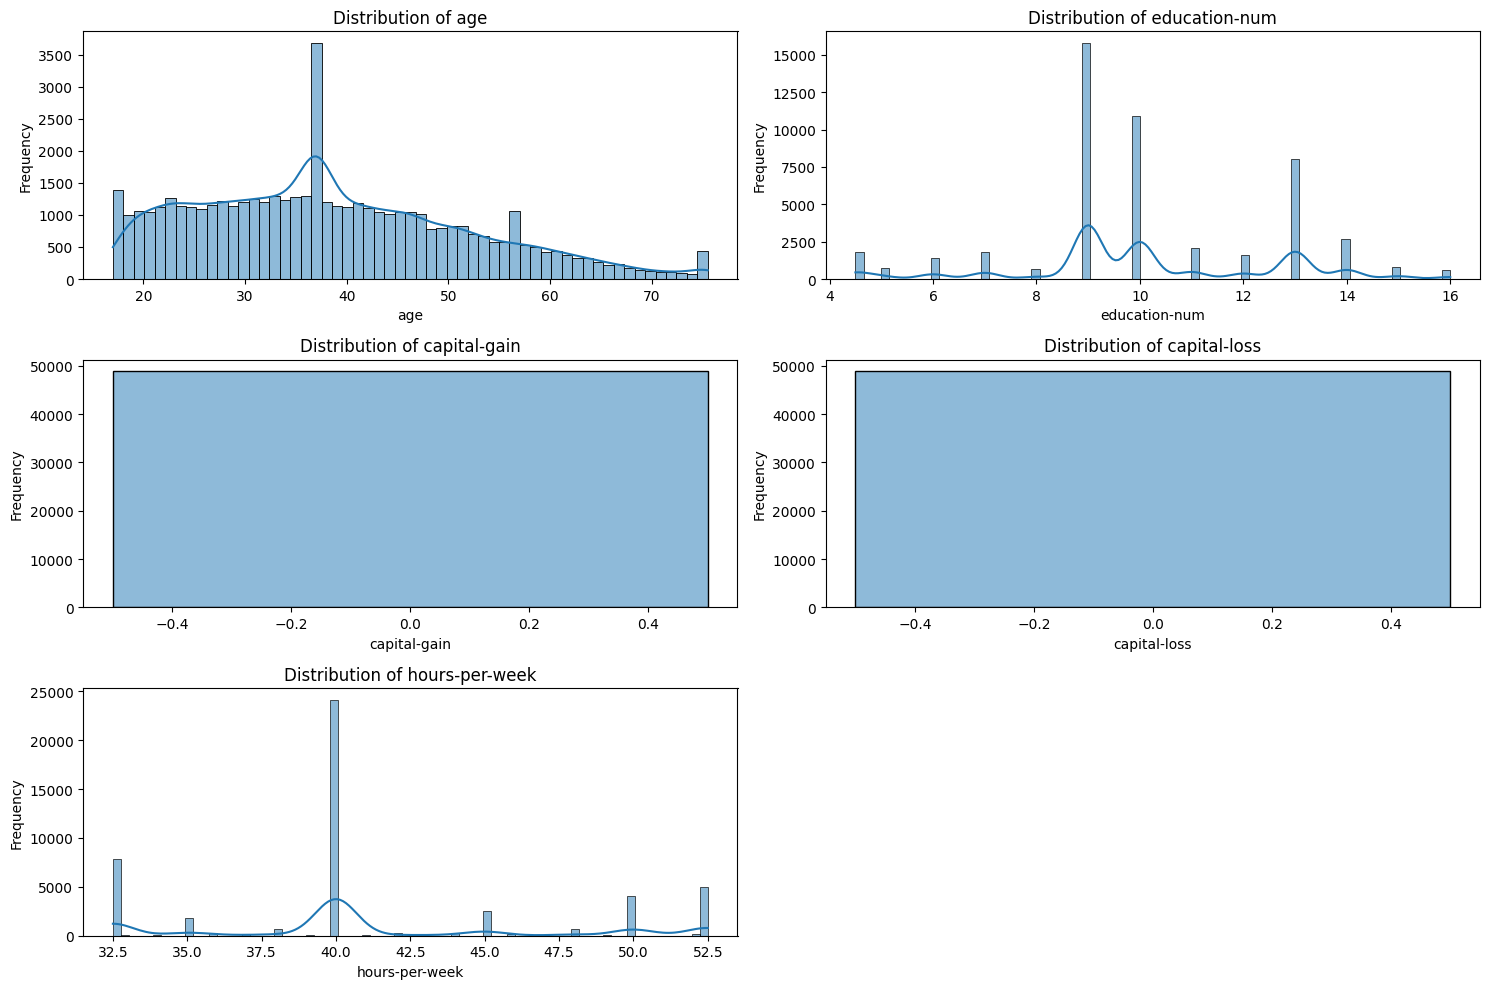

In [67]:
numerical_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_at[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Distribution of Categorical Features

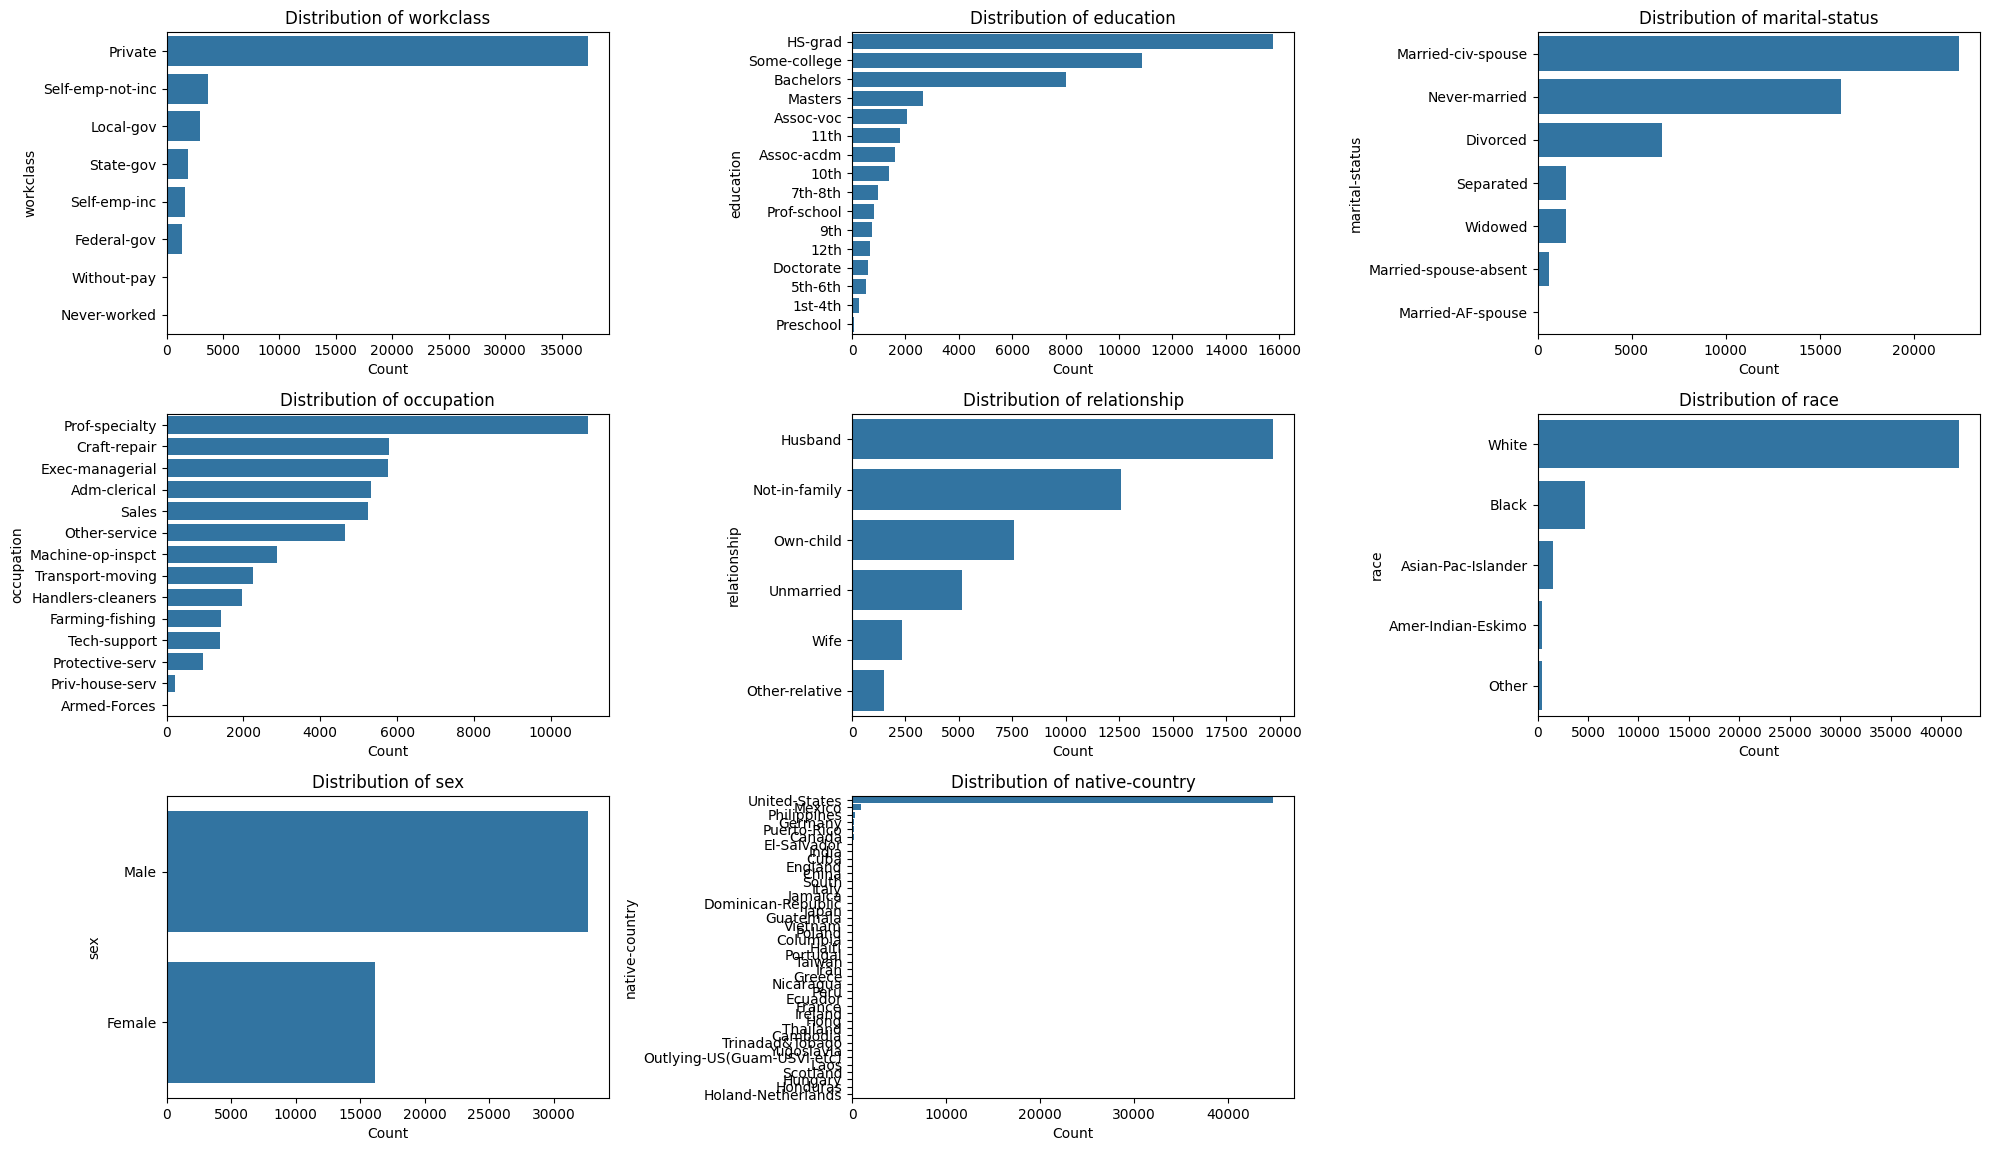

In [68]:
categorical_cols = df_at.select_dtypes(include='object').columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 3, i + 1) # Adjust subplot grid based on number of categorical columns
    sns.countplot(y=df_at[col], order = df_at[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Analyze Correlation between variables

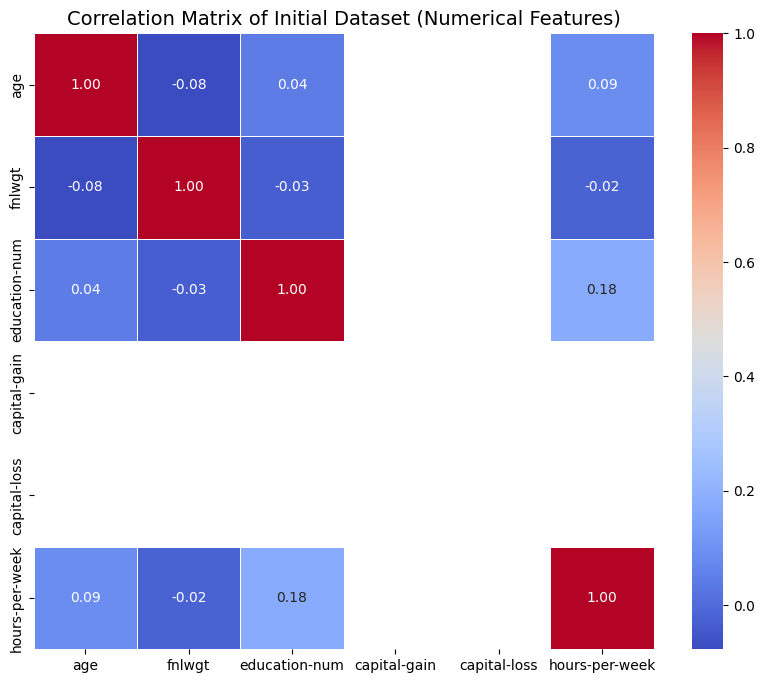

In [69]:
num_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
corr_matrix = df_at[num_cols].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Initial Dataset (Numerical Features)", fontsize=14)
plt.show()

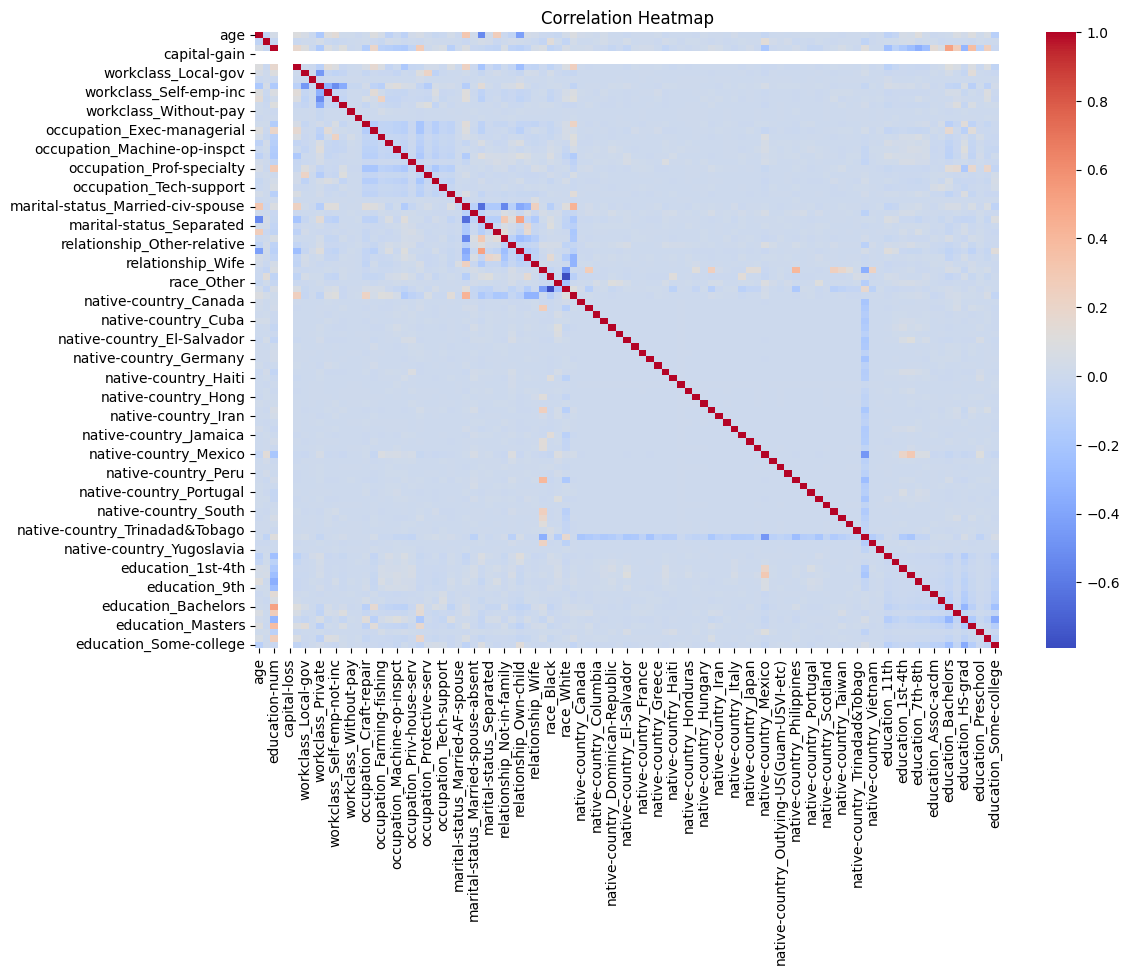

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(data_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

### Visualize High-Dimensional Data using PCA (2D)

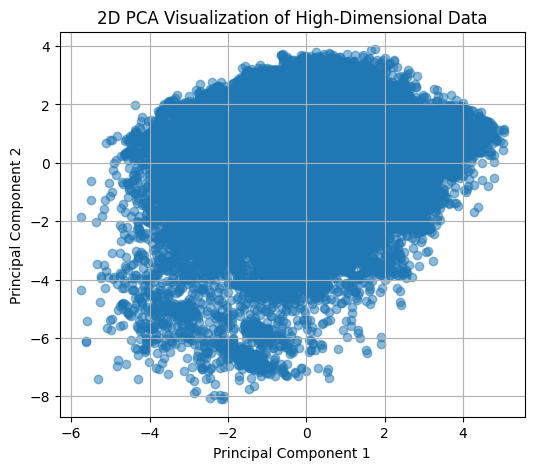

In [71]:
plt.figure(figsize=(6, 5))
plt.scatter(X_pca_95[:, 0], X_pca_95[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization of High-Dimensional Data')
plt.grid(True)
plt.show()

### Clustering (K-MEANS)

### Determine Optimal K for K-Means (Elbow Method)


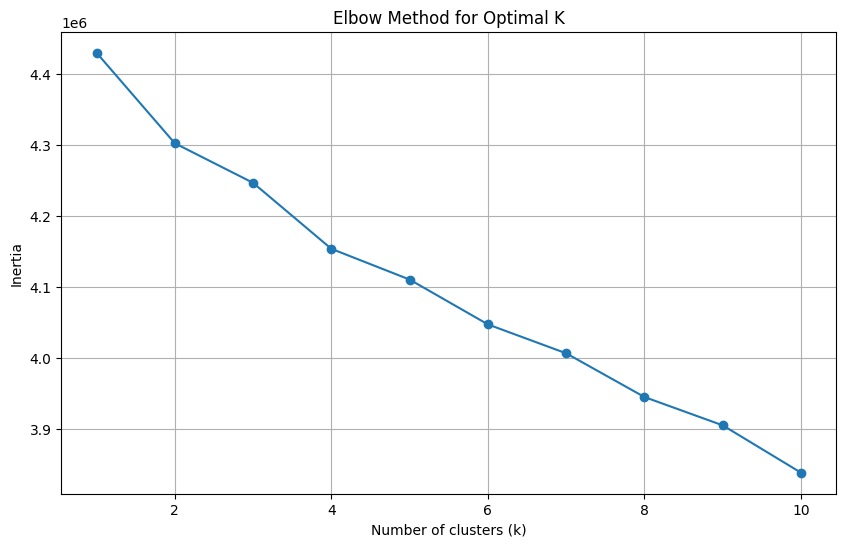

In [72]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_95)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### K-Means Clustering



In [73]:
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_model.fit(X_pca_95)
kmeans_labels = kmeans_model.labels_

print("K-Means clustering applied successfully with 3 clusters.")
print("First 10 cluster labels:", kmeans_labels[:10])

K-Means clustering applied successfully with 3 clusters.
First 10 cluster labels: [2 0 2 0 0 0 2 0 2 0]


### Evaluate K-Means Clustering (Silhouette Score)


In [74]:
# to evaluate the quality and separation of the clusters
silhouette_avg = silhouette_score(X_pca_95, kmeans_labels)
print(f"Silhouette Score for K-Means clustering: {silhouette_avg:.2f}")

Silhouette Score for K-Means clustering: 0.06


### Visualize K-Means Clusters

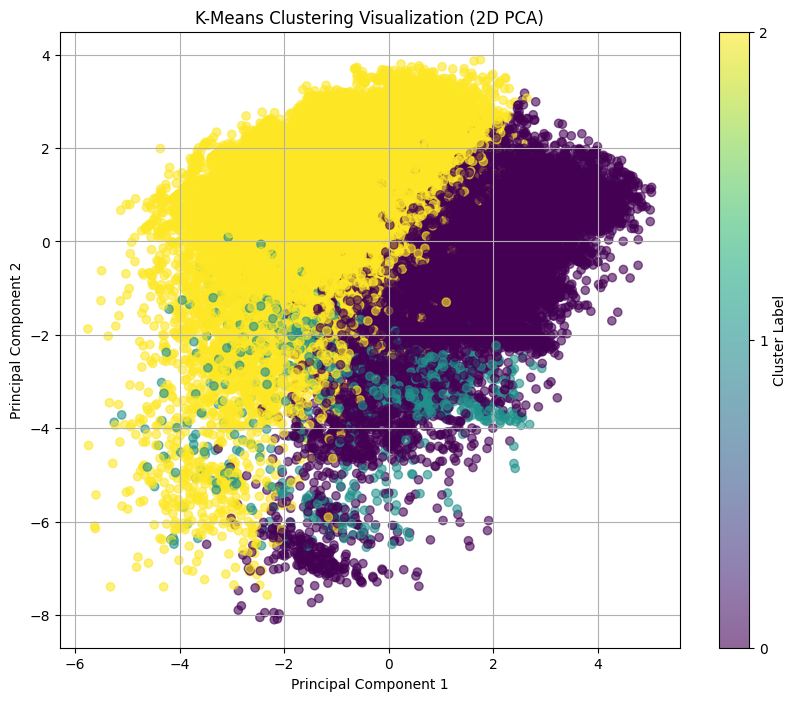

In [75]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_95[:, 0], X_pca_95[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Visualization (2D PCA)')
plt.colorbar(scatter, ticks=range(len(np.unique(kmeans_labels))), label='Cluster Label')
plt.grid(True)
plt.show()


### Sample Data for Agglomerative Clustering


In [76]:
total_rows = X_pca_95.shape[0]
sample_size = int(total_rows * 0.15)

np.random.seed(42) # for reproducibility
random_indices = np.random.choice(total_rows, size=sample_size, replace=False)
X_pca_sampled = X_pca_95[random_indices]

print(f"Original data shape: {X_pca_95.shape}")
print(f"Sampled data shape: {X_pca_sampled.shape}")

Original data shape: (48826, 80)
Sampled data shape: (7323, 80)


In [77]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_model = AgglomerativeClustering(n_clusters=3)
agg_labels = agglomerative_model.fit_predict(X_pca_sampled)

print("Agglomerative Clustering applied successfully with 3 clusters.")
print("First 10 cluster labels:", agg_labels[:10])

Agglomerative Clustering applied successfully with 3 clusters.
First 10 cluster labels: [2 2 2 2 2 2 2 2 2 1]


In [78]:
from sklearn.metrics import silhouette_score

silhouette_agg = silhouette_score(X_pca_sampled, agg_labels)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_agg:.2f}")

Silhouette Score for Agglomerative Clustering: 0.44


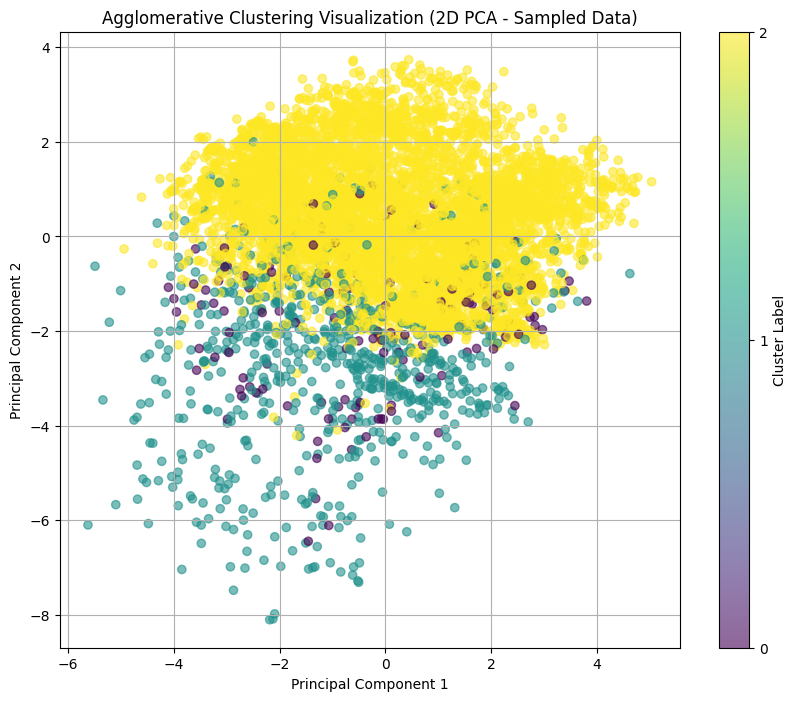

In [79]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_sampled[:, 0], X_pca_sampled[:, 1], c=agg_labels, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering Visualization (2D PCA - Sampled Data)')
plt.colorbar(scatter, ticks=range(len(np.unique(agg_labels))), label='Cluster Label')
plt.grid(True)
plt.show()

### Interpretation & Profiling

### Data for K-Means Cluster Profiling

In [81]:
df_clustered = x.copy()
df_clustered['Cluster'] = kmeans_labels
df_clustered = df_clustered.drop(columns=['income'])
df_clustered.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [83]:
df_clustered = df_at.copy()
df_clustered['Cluster'] = kmeans_labels
df_clustered.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Cluster
0,39.0,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40.0,United-States,2
1,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,0
2,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,2
3,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,0
4,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,0


### Profile K-Means Clusters

In [84]:
numerical_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

print("\n--- K-Means Cluster Profiling ---")

for cluster_num in sorted(df_clustered['Cluster'].unique()):
    print(f"\n\n----- Cluster {cluster_num} -----")
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_num]

    print("\nNumerical Feature Statistics:")
    # Calculate mean, median, and standard deviation for numerical columns
    numerical_summary = cluster_data[numerical_cols].agg(['mean', 'median', 'std'])
    print(numerical_summary)

    print("\nCategorical Feature Frequencies:")
    for col in categorical_cols:
        print(f"  - {col}:")
        # Get top 3 value counts for categorical columns
        top_categories = cluster_data[col].value_counts(normalize=True).head(3)
        print(top_categories)



--- K-Means Cluster Profiling ---


----- Cluster 0 -----

Numerical Feature Statistics:
              age  education-num  capital-gain  capital-loss  hours-per-week
mean    43.129844      10.560781           0.0           0.0       42.865785
median  41.000000      10.000000           0.0           0.0       40.000000
std     11.615067       2.479543           0.0           0.0        6.051004

Categorical Feature Frequencies:
  - workclass:
workclass
Private             0.686363
Self-emp-not-inc    0.116422
Local-gov           0.066470
Name: proportion, dtype: float64
  - education:
education
HS-grad         0.327388
Bachelors       0.193349
Some-college    0.187593
Name: proportion, dtype: float64
  - marital-status:
marital-status
Married-civ-spouse    0.953914
Divorced              0.038925
Widowed               0.002065
Name: proportion, dtype: float64
  - occupation:
occupation
Prof-specialty     0.225683
Craft-repair       0.161322
Exec-managerial    0.160970
Name: proportion, 

### Data for Income Comparison


In [85]:
df_clustered['income'] = x
df_clustered.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Cluster,income
0,39.0,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40.0,United-States,2,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,0,<=50K
2,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,2,<=50K
3,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,0,<=50K
4,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,0,<=50K


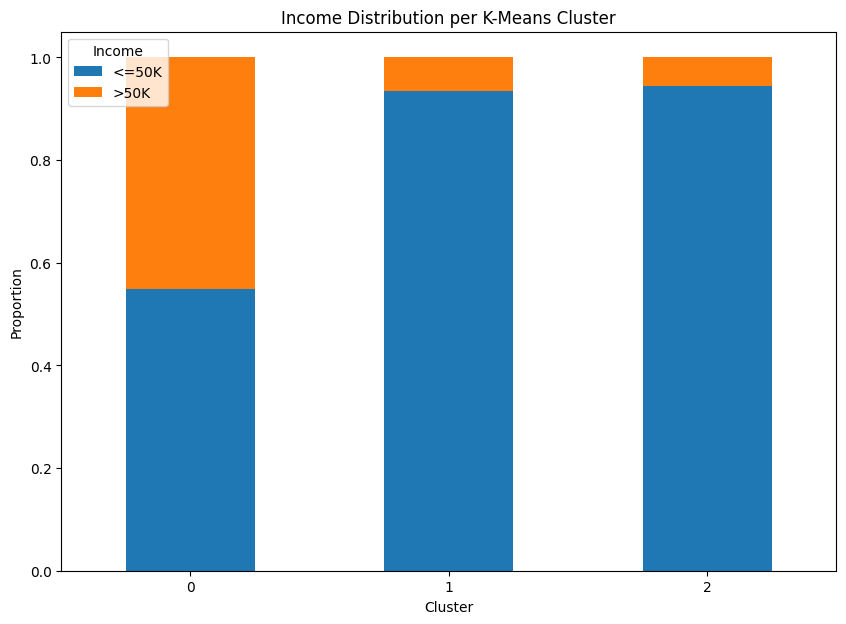

In [86]:
income_cluster = df_clustered.groupby('Cluster')['income'].value_counts(normalize=True).unstack()
income_cluster.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Income Distribution per K-Means Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Income')
plt.show()

* Upskilling programs:

  Cluster 1 (The Experienced, Lower-Education Group)

  Cluster 2 (The Younger, Single Individuals)


* Tax reform:

  Cluster 1 & Cluster 2 (Predominantly Low-Income Groups)
  

* Financial aid or inclusion efforts:

  Cluster 1 & Cluster 2 (Predominantly Low-Income Groups)